# Análisis DataSet Adventure Works 

In [9]:
# Importación de librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Decision tree (Modelo de clasificación)

In [12]:
# Lectura del DataSet
df_var = pd.read_csv('Var Discreta Adq .csv', sep = ';')

In [14]:
#Visualizacion previa del DataFrame
df_var.head(10)

,TotalAmount,BikePurchase,CustomerID,Country,CountryRegionCode,Group,PersonID,PersonType,DateFirstPurchase,BirthDate,Age,MaritalStatus,YearlyIncome,Gender,TotalChildren,Education,Occupation,HomeOwnerFlag,NumberCarsOwned
0,8139,1,11003,Australia,AU,Pacific,11358,IN,37073,24883,52,S,50001-75000,F,0,Bachelors,Professional,0,1
1,2994,1,14501,Southwest,US,North America,11211,IN,37073,14013,82,M,75001-100000,M,4,Graduate Degree,Management,1,2
2,4118,1,21768,Canada,CA,North America,14078,IN,37073,17036,74,S,50001-75000,M,5,Bachelors,Management,1,3
3,4631,1,25863,Northwest,US,North America,10553,IN,37073,17139,74,S,25001-50000,F,5,High School,Professional,1,3
4,3399,1,28389,France,FR,Europe,15519,IN,37073,23729,56,S,0-25000,F,3,High School,Manual,0,0
5,8121,1,11005,Australia,AU,Pacific,6990,IN,37074,23959,55,S,50001-75000,M,0,Bachelors,Professional,1,1
6,8133,1,11011,Australia,AU,Pacific,18258,IN,37074,23319,57,M,50001-75000,M,4,Bachelors,Professional,1,4
7,5938,1,16624,Australia,AU,Pacific,14897,IN,37074,26507,48,S,75001-100000,M,0,Bachelors,Professional,0,3
8,6051,1,27645,Southwest,US,North America,13514,IN,37074,22511,59,M,greater than 100000,M,1,High School,Professional,1,4
9,5873,1,16351,Australia,AU,Pacific,4916,IN,37075,19912,66,S,75001-100000,F,2,Partial College,Skilled Manual,0,2


## 1 Análisis exploratorio de los datos

In [17]:
# ¿Que columnas tienen los datos?
df_var.columns

Index(['TotalAmount', 'BikePurchase', 'CustomerID', 'Country',
       'CountryRegionCode', 'Group', 'PersonID', 'PersonType',
       'DateFirstPurchase', 'BirthDate', 'Age', 'MaritalStatus',
       'YearlyIncome', 'Gender', 'TotalChildren', 'Education', 'Occupation',
       'HomeOwnerFlag', 'NumberCarsOwned'],
      dtype='object')

In [19]:
# ¿Que tamaño tienen los datos?
df_var.shape

(18484, 19)

In [21]:
# ¿Hay valores nulos en los datos?
df_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   TotalAmount        18484 non-null  int64 
 1   BikePurchase       18484 non-null  int64 
 2   CustomerID         18484 non-null  int64 
 3   Country            18484 non-null  object
 4   CountryRegionCode  18484 non-null  object
 5   Group              18484 non-null  object
 6   PersonID           18484 non-null  int64 
 7   PersonType         18484 non-null  object
 8   DateFirstPurchase  18484 non-null  int64 
 9   BirthDate          18484 non-null  int64 
 10  Age                18484 non-null  int64 
 11  MaritalStatus      18484 non-null  object
 12  YearlyIncome       18484 non-null  object
 13  Gender             18484 non-null  object
 14  TotalChildren      18484 non-null  int64 
 15  Education          18484 non-null  object
 16  Occupation         18484 non-null  objec

* No se tienen datos nulos en el DataFrame por ende nos saltamos el paso de limpieza de datos nulos

In [24]:
# Como se comportan las variables categoricas
df_var.describe(include=['O'])

,Country,CountryRegionCode,Group,PersonType,MaritalStatus,YearlyIncome,Gender,Education,Occupation
count,18484,18484,18484,18484,18484,18484,18484,18484,18484
unique,10,6,3,1,2,5,2,5,5
top,Southwest,US,North America,IN,M,25001-50000,M,Bachelors,Professional
freq,4450,7819,9390,18484,10011,5704,9351,5356,5520


* Dada la descripción anterior seleccionamos las variables con las que vamos a trabajar el modelo de clasificación:

In [27]:
df_var1 = df_var[['BikePurchase','Occupation','MaritalStatus','Age','Gender','NumberCarsOwned','Education','TotalChildren','YearlyIncome','TotalAmount']]

In [29]:
df_var1.head(10)

,BikePurchase,Occupation,MaritalStatus,Age,Gender,NumberCarsOwned,Education,TotalChildren,YearlyIncome,TotalAmount
0,1,Professional,S,52,F,1,Bachelors,0,50001-75000,8139
1,1,Management,M,82,M,2,Graduate Degree,4,75001-100000,2994
2,1,Management,S,74,M,3,Bachelors,5,50001-75000,4118
3,1,Professional,S,74,F,3,High School,5,25001-50000,4631
4,1,Manual,S,56,F,0,High School,3,0-25000,3399
5,1,Professional,S,55,M,1,Bachelors,0,50001-75000,8121
6,1,Professional,M,57,M,4,Bachelors,4,50001-75000,8133
7,1,Professional,S,48,M,3,Bachelors,0,75001-100000,5938
8,1,Professional,M,59,M,4,High School,1,greater than 100000,6051
9,1,Skilled Manual,S,66,F,2,Partial College,2,75001-100000,5873


* Procederemos a realizar a conversión de algunas variables categóricas a variables dicotómicas, ya que el modelo solo acepta valores int, float o numeric

* Para la variable **Occupation** tenemos las siguientes categorias:
  + Professional
  + Management
  + Manual
  + Skilled Manual
  + Clerical
 
Que en variables númericas pasarián a estar clasificadas como: 

  + Professional:   1
  + Management:     2
  + Manual:         3
  + Skilled Manual: 4
  + Clerical:       5



In [33]:
df_var1['Occupation'] = df_var1['Occupation'].map({'Professional': 1, 'Management': 2, 'Manual': 3, 
                                                   'Skilled Manual': 4, 'Clerical': 5}).astype(int)

In [35]:
df_var1.head()

,BikePurchase,Occupation,MaritalStatus,Age,Gender,NumberCarsOwned,Education,TotalChildren,YearlyIncome,TotalAmount
0,1,1,S,52,F,1,Bachelors,0,50001-75000,8139
1,1,2,M,82,M,2,Graduate Degree,4,75001-100000,2994
2,1,2,S,74,M,3,Bachelors,5,50001-75000,4118
3,1,1,S,74,F,3,High School,5,25001-50000,4631
4,1,3,S,56,F,0,High School,3,0-25000,3399


* Para la variable **MaritalStatus** tenemos las siguientes categorias:
   + M
   + S

Que en variables dicotómicas pasarián a estar clasificadas como:

  + M: 1
  + S: 0


In [38]:
df_var1['MaritalStatus'] = df_var1['MaritalStatus'].map({'M': 1, 'S': 0 }).astype(int)

df_var1.head()

* Para la variable **Gender** tenemos las siguientes categorias:
   + F
   + M

Que en variables dicótomicas pasarian a estar clasificadas como:

   + F: 1
   + M: 0

In [42]:
df_var1['Gender'] = df_var1['Gender'].map({'F': 1, 'M': 0 }).astype(int)

* Para la variable **Education** tenemos las siguientes categorias:
  + Bachelors
  + Graduate Degree
  + High School
  + Partial College
  + Partial High School

Que en variables numericas pasarian a estar clasificadas como:

  + Bachelors: 1
  + Graduate Degree: 2
  + High School: 3
  + Partial College: 4
  + Partial High School: 5

In [45]:
# Eliminamos espacios al inicio o final de la categria
df_var1['Education'] = df_var1['Education'].str.strip()

In [47]:
df_var1['Education'] = df_var1['Education'].map({'Bachelors': 1, 'Graduate Degree': 2, 'High School': 3, 
                                                'Partial College': 4, 'Partial High School': 5}).astype(int)

* Para la variable **YearlyIncome** tenemos las siguientes categorias:
  + 0-25000
  + 25001-50000
  + 50001-75000
  + 75001-100000
  + greater than 100000

Que en variables numericas pasarian a estar clasificadas como:

  + 0-25000 : 1
  + 25001-50000: 2
  + 50001-75000: 3
  + 75001-100000: 4
  + greater than 100000: 5

In [50]:
# Eliminamos espacios al inicio o final de la categria
df_var1['YearlyIncome'] = df_var1['YearlyIncome'].str.strip()

In [52]:
df_var1['YearlyIncome'] = df_var1['YearlyIncome'].map({'0-25000': 1, '25001-50000': 2, '50001-75000': 3, 
                                                '75001-100000': 4, 'greater than 100000': 5}).astype(int)

In [54]:
df_var1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   BikePurchase     18484 non-null  int64
 1   Occupation       18484 non-null  int32
 2   MaritalStatus    18484 non-null  int32
 3   Age              18484 non-null  int64
 4   Gender           18484 non-null  int32
 5   NumberCarsOwned  18484 non-null  int64
 6   Education        18484 non-null  int32
 7   TotalChildren    18484 non-null  int64
 8   YearlyIncome     18484 non-null  int32
 9   TotalAmount      18484 non-null  int64
dtypes: int32(5), int64(5)
memory usage: 1.1 MB


In [56]:
df_var1.dtypes

BikePurchase       int64
Occupation         int32
MaritalStatus      int32
Age                int64
Gender             int32
NumberCarsOwned    int64
Education          int32
TotalChildren      int64
YearlyIncome       int32
TotalAmount        int64
dtype: object

## 2. Del DataFrame procedemos a separar los datos para el modelo (Datos de entrenamiento y Datos de prueba)

In [59]:
# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split


* Asigaremos un 30% del DataFrame para la parte de prueba y un 70% para la parte de entrenamiento:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df_var1.drop(columns = 'BikePurchase'),
                                        df_var1['BikePurchase'],
                                        test_size=0.30,
                                        random_state = 123
                                    )

## 3. Creación del modelo

In [65]:
# Librerias para la creación del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

* Para los modelos de árbol de decisión de clasificación se debe definir el clasificador y los valores de los hiperparametros a probar, como se realizara a continuación:

In [68]:
clasi = DecisionTreeClassifier(random_state=42)
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

* Seguido a esto, realizaremos la busqueda de los mejores hiperparametros

In [71]:
grid_search = GridSearchCV(clasi, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

In [73]:
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 2}


## 3.1 Creación del modelo:

* Con los parámetros que nos da la función GridSearchCV procedemos a crear el modelo, con la diferencia de el max_depth lo tomaremos en 5 para poder tener una vista mas ampliada de los nodos del árbol 

In [80]:
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 42
          )


In [82]:
# Entrenamiento del modelo:
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Profundidad del árbol: 5
Número de nodos terminales: 7


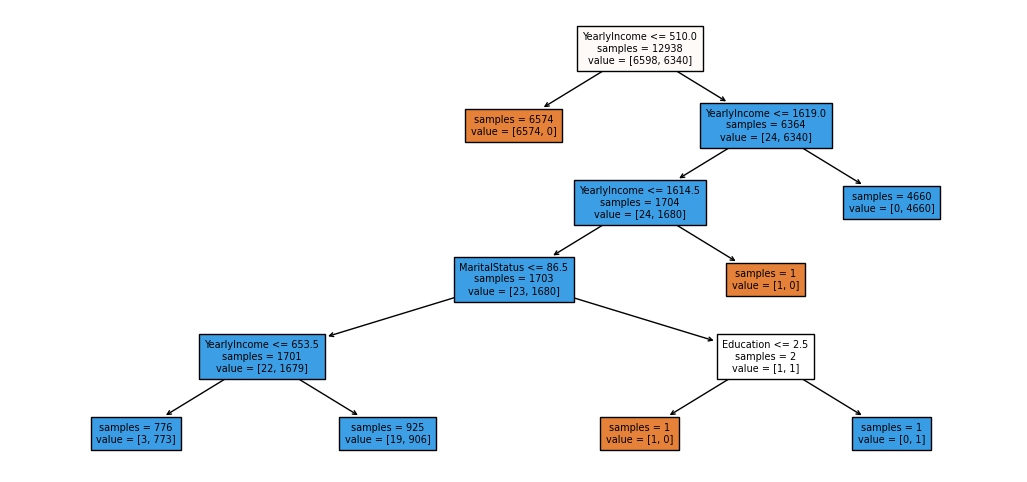

In [84]:
# Visualizacion del modelo

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = df_var1.columns,
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax
       )

## 4 Evaluación del modelo

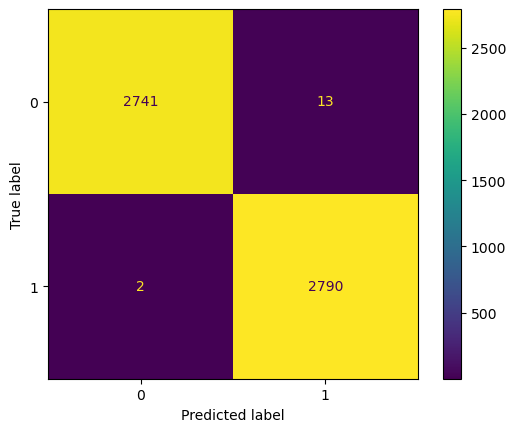

In [87]:
# Predicción de Y
predic = modelo.predict(X = X_test,)

matriz = confusion_matrix(y_test,predic)
ConfusionMatrixDisplay(matriz).plot()

In [89]:
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predic,
            normalize = True
           )
print(accuracy)

0.9972953479985576


In [101]:
print("Importancia de los predictores en el modelo")

importancia_predictores = pd.DataFrame(
                            {'predictor': X_test.columns,
                             'importancia': modelo.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo


,predictor,importancia
8,TotalAmount,0.999697
6,TotalChildren,0.000156
2,Age,0.000148
0,Occupation,0.000000
1,MaritalStatus,0.000000
3,Gender,0.000000
4,NumberCarsOwned,0.000000
5,Education,0.000000
7,YearlyIncome,0.000000


In [95]:
importancia = pd.DataFrame(pd.Series(modelo.feature_importances_, index=X_train.columns).sort_values(ascending=False)).T

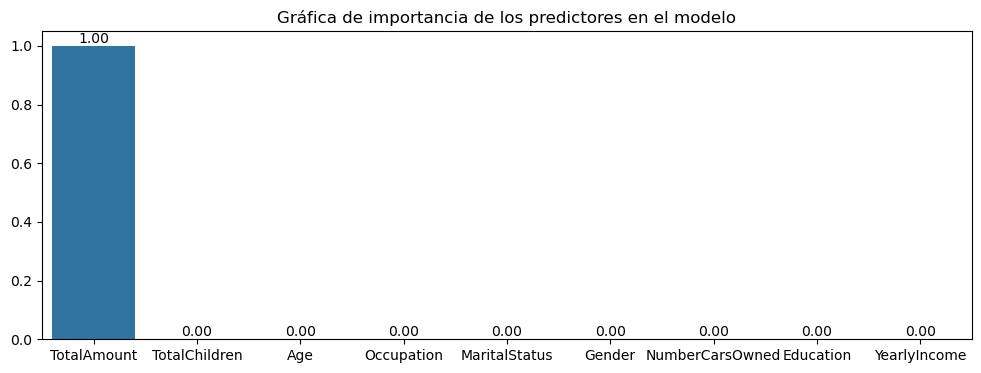

In [99]:
plt.figure(figsize=(12,4))
sns.barplot(data=importancia)

for index, value in enumerate(importancia.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Gráfica de importancia de los predictores en el modelo")
plt.show()

## 5. Conclusiones

* Respondiendo a la pregunta de la prueba técnica:
    + ¿Qué tan confiable es el modelo?
La evaluación del modelo se realizo por medio de una matriz de confusión en la cual se evaluaron las variables de entrenamiento (que contiene información real del DatSet) contra las variables predictoras obteniendo un nivel de confianza del 99,7%
    + ¿Cuál o cuales son las variables mas importantes a la hora de realizar una compra por parte del cliente?
La variable más importante a la hora de realizar una compra es la variable TotalAmount con un nivel de importancia del 99.9% obtenido por medio de la función sort_values


* Le siguen las variables TotalChildren, Age pero con un nivel de importancia muy bajo, casi cercano a cero como se puede apreciar en la tabla presentada.

* Realizando un análisis de las variables presentadas tiene sentido que la variable significativa a la hora de hacer una compra de bicicleta sea TotalAmount que se interpreta como los ingresos totales de la persona ya sea a nivel mensual o anual, ya que la compra de una bicicleta se puede catalogar como un lujo adquirido no una necesidad vital, por ende entre mas ingresos tenga la persona es mas factible que opte por comprarla bicicleta debido a que esta compra no va a afectar sus responsabilidades económicas.

* El hecho de que las demás variables ingresadas en el modelo de clasificación no tuvieran un nivel de significancia considerable se debe a la alta correlación que existe entre la variable TotalAmount contra las demás variables

* Lo anterior se explica de la siguiente manera:
    + TotalAmount vs Education : Por comportamiento social se espera que entre mayor sea el grado de educación de una persona sus ingresos sean mas altos, por ende al escoger cualquiera de las dos variables se espera tener los mismos resultados
    + TotalAmount vs Occupation: Sucede igual que el comportamiento anterior, entre mas alto el grado de desempeño laboral mas ingresos tiene la persona
    + TotalAmount vs YearIncome: Esta correlación esta al 100% y que el total de ingresos da la clasificación de la variable YearIncome

* De manera general la variable TotalAmount va a influir sobre las demás variables del modelo, se presenta una relación directamente proporcional

* Las demás variables son presentan un nivel significativo de importancia, de acuerdo al modelo: Ni el género, ni el estado civil, ni el numero de carros, ni el numero de hijos va a influir directamente en la decisión de compra.